In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from model import *
from data import *

/home/jericho/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Train your Unet with cartilage data
membrane data is in folder chicken/, it is a binary classification task.

The input shape of image and mask are the same :(batch_size,rows,cols,channel = 1)

### Train with data generator

In [3]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'data/chicken/train','image','label',data_gen_args,save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane2.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=2000,epochs=5,callbacks=[model_checkpoint])

/home/jerichoo/unet/model.py:34: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge6 = merge([drop4,up6], mode = 'concat', concat_axis = 3)
/home/jerichoo/tensorflow2/lib/python3.5/site-packages/keras/legacy/layers.py:465: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)
/home/jerichoo/unet/model.py:39: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge7 = merge([conv3,up7], mode = 'concat', concat_axis = 3)
/home/jerichoo/unet/model.py:44: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge8 = merge([conv2,up8], mode =

Epoch 1/5
Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
2000/2000 [==============================] - 312s 156ms/step - loss: 0.0788 - acc: 0.9687

Epoch 00001: loss improved from inf to 0.07876, saving model to unet_membrane.hdf5
Epoch 2/5
2000/2000 [==============================] - 293s 147ms/step - loss: 0.0211 - acc: 0.9919

Epoch 00002: loss improved from 0.07876 to 0.02108, saving model to unet_membrane.hdf5
Epoch 3/5
2000/2000 [==============================] - 273s 136ms/step - loss: 0.0170 - acc: 0.9935

Epoch 00003: loss improved from 0.02108 to 0.01700, saving model to unet_membrane.hdf5
Epoch 4/5
2000/2000 [==============================] - 306s 153ms/step - loss: 0.0121 - acc: 0.9952

Epoch 00004: loss improved from 0.01700 to 0.01206, saving model to unet_membrane.hdf5
Epoch 5/5
2000/2000 [==============================] - 276s 138ms/step - loss: 0.0123 - acc: 0.9953

Epoch 00005: loss did not improve from 0.01206


### Test your model and save predicted results

In [13]:
testGene = testGenerator("data/chicken/test")
model = unet()
model.load_weights("unet_membrane.hdf5")

/home/jericho/unet/model.py:34: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge6 = merge([drop4,up6], mode = 'concat', concat_axis = 3)
/home/jericho/anaconda3/lib/python3.6/site-packages/keras/legacy/layers.py:465: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)
/home/jericho/unet/model.py:39: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge7 = merge([conv3,up7], mode = 'concat', concat_axis = 3)
/home/jericho/unet/model.py:44: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge8 = merge([conv2,up8], mode = 'conc

In [14]:
results = model.predict_generator(testGene,30,verbose=1)
saveResult("data/chicken/test",results)

/home/jericho/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


30/30 [==============================] - 29s 972ms/step


/home/jericho/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


### Evaluate the model using different test directories
Using the keras evaluate function

In [4]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')

thickness_mm = [39, 34, 29, 24, 19, 14, 9, 4]
accuracies = np.zeros([3,8])
losses = np.zeros([3,8])
model = unet()
model.load_weights("unet_membrane.hdf5")
        
for ii, radius in enumerate([5, 10, 15]):
    for jj, thickness in enumerate([39, 34, 29, 24, 19, 14, 9, 4]):

        myGene = trainGenerator(
            2,
            'data/chicken/' + f'test_{radius}' + '/' + f'{thickness}',
            'image',
            'label',
            data_gen_args,
            save_to_dir=None)
        results = model.evaluate_generator(myGene, 1, verbose=1, workers=3)
        accuracies[ii,jj] = results[1]
        losses[ii,jj] = results[0]

/home/jericho/unet/unet/model.py:34: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge6 = merge([drop4,up6], mode = 'concat', concat_axis = 3)
/home/jericho/anaconda3/lib/python3.6/site-packages/keras/legacy/layers.py:465: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)
/home/jericho/unet/unet/model.py:39: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge7 = merge([conv3,up7], mode = 'concat', concat_axis = 3)
/home/jericho/unet/unet/model.py:44: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge8 = merge([conv2,up8

Found 2 images belonging to 1 classes.
Found 2 images belonging to 1 classes.
1/1 [==============================] - 2s 2s/step
Found 2 images belonging to 1 classes.
Found 2 images belonging to 1 classes.
1/1 [==============================] - 2s 2s/step
Found 2 images belonging to 1 classes.
Found 2 images belonging to 1 classes.
1/1 [==============================] - 2s 2s/step
Found 2 images belonging to 1 classes.
Found 2 images belonging to 1 classes.
1/1 [==============================] - 2s 2s/step
Found 2 images belonging to 1 classes.
Found 2 images belonging to 1 classes.
1/1 [==============================] - 2s 2s/step
Found 2 images belonging to 1 classes.
Found 2 images belonging to 1 classes.
1/1 [==============================] - 2s 2s/step
Found 2 images belonging to 1 classes.
Found 2 images belonging to 1 classes.
1/1 [==============================] - 2s 2s/step
Found 2 images belonging to 1 classes.
Found 2 images belonging to 1 classes.
1/1 [=====================

### Put predictions in the evaluated directories to view the results

In [7]:
data_gen_args = dict(
    rotation_range=0,
    width_shift_range=0,
    height_shift_range=0,
    shear_range=0,
    zoom_range=0,
    horizontal_flip=False)

thickness_mm = [39, 34, 29, 24, 19, 14, 9, 4]
accuracies = np.zeros([3,8])
losses = np.zeros([3,8])
model = unet()
model.load_weights("unet_membrane.hdf5")

# 'data/chicken/' + f'test_{radius}' + '/' + f'{thickness}',
        
for ii, radius in enumerate([5, 10, 15]):
    for jj, thickness in enumerate([39, 34, 29, 24, 19, 14, 9, 4]):

        myGene = trainGenerator(
            2,
            'data/chicken/' + f'test_{radius}' + '/' + f'{thickness}',
            'image',
            'label',
            data_gen_args,
            save_to_dir=None)
        results = model.predict_generator(myGene, 1, verbose=1, workers=3)
        saveResult('data/chicken/' + f'test_{radius}' + '/' + f'{thickness}',results)

/home/jericho/unet/model.py:34: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge6 = merge([drop4,up6], mode = 'concat', concat_axis = 3)
/home/jericho/anaconda3/lib/python3.6/site-packages/keras/legacy/layers.py:465: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)
/home/jericho/unet/model.py:39: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge7 = merge([conv3,up7], mode = 'concat', concat_axis = 3)
/home/jericho/unet/model.py:44: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge8 = merge([conv2,up8], mode = 'conc

Found 2 images belonging to 1 classes.
Found 2 images belonging to 1 classes.
1/1 [==============================] - 2s 2s/step
Found 2 images belonging to 1 classes.
Found 2 images belonging to 1 classes.


/home/jericho/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


1/1 [==============================] - 2s 2s/step
Found 2 images belonging to 1 classes.
Found 2 images belonging to 1 classes.
1/1 [==============================] - 2s 2s/step
Found 2 images belonging to 1 classes.
Found 2 images belonging to 1 classes.
1/1 [==============================] - 2s 2s/step
Found 2 images belonging to 1 classes.
Found 2 images belonging to 1 classes.
1/1 [==============================] - 2s 2s/step
Found 2 images belonging to 1 classes.
Found 2 images belonging to 1 classes.
1/1 [==============================] - 2s 2s/step
Found 2 images belonging to 1 classes.
Found 2 images belonging to 1 classes.
1/1 [==============================] - 2s 2s/step
Found 2 images belonging to 1 classes.
Found 2 images belonging to 1 classes.
1/1 [==============================] - 2s 2s/step
Found 2 images belonging to 1 classes.
Found 2 images belonging to 1 classes.
1/1 [==============================] - 2s 2s/step
Found 2 images belonging to 1 classes.
Found 2 images 

### Plotting the results

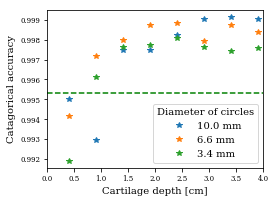

In [6]:
xvec = np.linspace(03.9,.4,8)

plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
fig = figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)

ax.plot(xvec,accuracies[0,:].T,'*')
ax.plot(xvec,accuracies[1,:].T,'*')
ax.plot(xvec,accuracies[2,:].T,'*')
ax.plot([0,4],[0.9953,0.9953],'g--')
#plt.ylim([0, 1])
ax.set_xlim([0, 4])
ax.set_ylabel('Catagorical accuracy')
ax.set_xlabel('Cartilage depth [cm]')
#ax.title('UNet accuracy')
ax.legend(['10.0 mm','6.6 mm','3.4 mm'],title='Diameter of circles')

plt.gcf().subplots_adjust(bottom=0.15,left=0.15)